In [5098]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import re

# Data exploration

We start by exploring the raw data to assess the quality of the data set

In [5099]:
raw_data = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

raw_data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [5100]:
raw_data.shape

(3376, 46)

In [5101]:
raw_data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [5102]:
raw_data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [5103]:
raw_data.select_dtypes(include=["object", "bool"])

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,DefaultData,ComplianceStatus,Outlier
0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,0659000030,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,Compliant,NaN
1,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,0659000220,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN,False,Compliant,NaN
2,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,0659000475,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,Compliant,NaN
3,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,0659000640,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,Compliant,NaN
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,0659000970,DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,False,Compliant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,1624049080,GREATER DUWAMISH,Office,Office,NaN,NaN,NaN,True,Error - Correct Default Data,NaN
3372,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,3558300000,DOWNTOWN,Other - Recreation,Other - Recreation,NaN,NaN,NaN,False,Compliant,NaN
3373,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,1794501150,MAGNOLIA / QUEEN ANNE,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,NaN,False,Compliant,NaN
3374,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,7883603155,GREATER DUWAMISH,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,NaN,False,Compliant,NaN


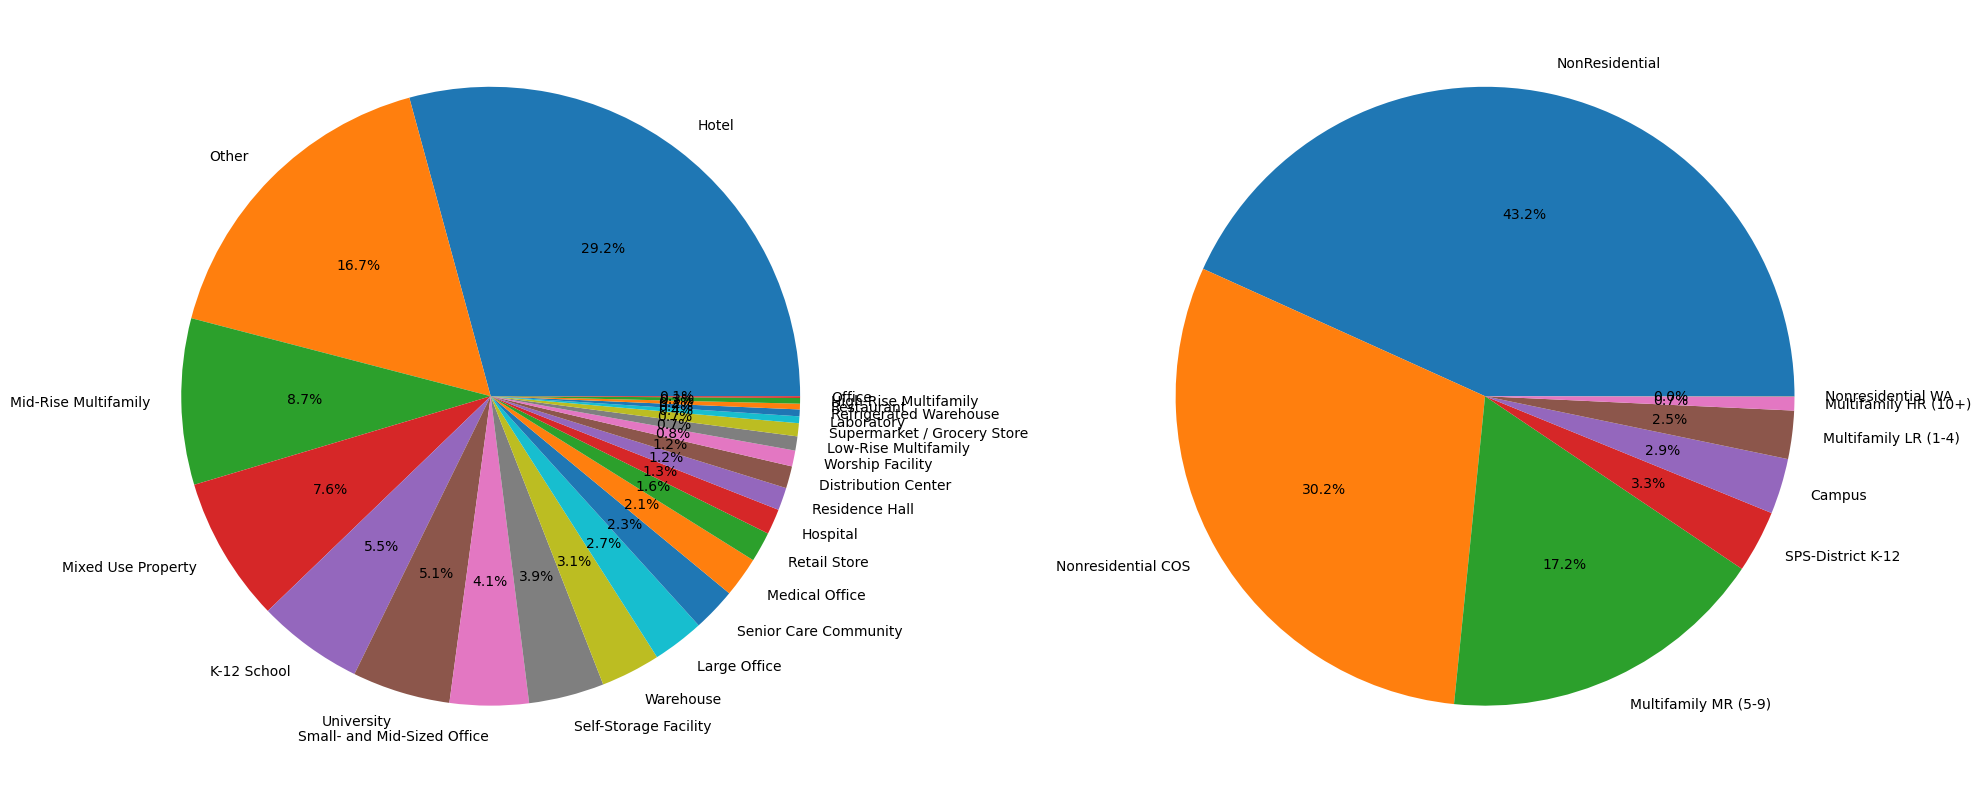

In [5104]:
fig, ax = plt.subplots(1, 2, figsize=[20, 35])
ax[0].pie(
    raw_data["PrimaryPropertyType"].value_counts(),
    labels=raw_data["PrimaryPropertyType"].unique(),
    autopct="%1.1f%%",
)
ax[1].pie(
    raw_data["BuildingType"].value_counts(),
    labels=raw_data["BuildingType"].unique(),
    autopct="%1.1f%%",
)
plt.tight_layout()
plt.show()

All columns seem to have the expected type, except maybe for YearsENERGYSTARCertified 

In [5105]:
raw_data["YearsENERGYSTARCertified"].unique()

array([nan, '2016', '2014', '2012', '20172015',
       '2017201620152014201320122011201020092008', '201020092007',
       '201720102007', '20162015', '20152014201220112009', '201220092008',
       '201620152014201320112010200920072000', '201620092008',
       '201620142012', '20162015201420122008',
       '2016201520142013201220112010200920082007200620052004',
       '201520142013', '2014201320112010200920082007', '2016201520142013',
       '2017201620152014201320112008', '201720162015201420132008',
       '20162015201320122010', '2015201320122010', '20162011201020092008',
       '2007', '2010', '20172016201520092008', '2017201320092008', '2015',
       '2017', '2017201120102007', '201720162014201320122011201020092007',
       '201720152014201220102008', '20092005', '2017201520142013',
       '201620152012', '2012201020072006', '20112009', '2009',
       '201620152014201320092008', '201620152014201320112009',
       '2016201520142013201220112010', '201720162012', '20102008',
       '20

In [5106]:
raw_data.select_dtypes(exclude=["object", "bool"])

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,98101.0,7,47.61220,-122.33799,1927,1.0,12,88434,...,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,NaN,249.98,2.83
1,2,2016,98101.0,7,47.61317,-122.33393,1996,1.0,11,103566,...,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,NaN,295.86,2.86
2,3,2016,98101.0,7,47.61393,-122.33810,1969,1.0,41,956110,...,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,NaN,2089.28,2.19
3,5,2016,98101.0,7,47.61412,-122.33664,1926,1.0,10,61320,...,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,NaN,286.43,4.67
4,8,2016,98121.0,7,47.61375,-122.34047,1980,1.0,18,175580,...,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,NaN,2,47.56722,-122.31154,1990,1.0,1,12294,...,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,NaN,20.94,1.70
3372,50223,2016,NaN,2,47.59625,-122.32283,2004,1.0,1,16000,...,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,NaN,32.17,2.01
3373,50224,2016,NaN,7,47.63644,-122.35784,1974,1.0,1,13157,...,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,NaN,223.54,16.99
3374,50225,2016,NaN,1,47.52832,-122.32431,1989,1.0,1,14101,...,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,NaN,22.11,1.57


In [5107]:
raw_data.isna().mean().mean()

0.12847723057902327

<Axes: >

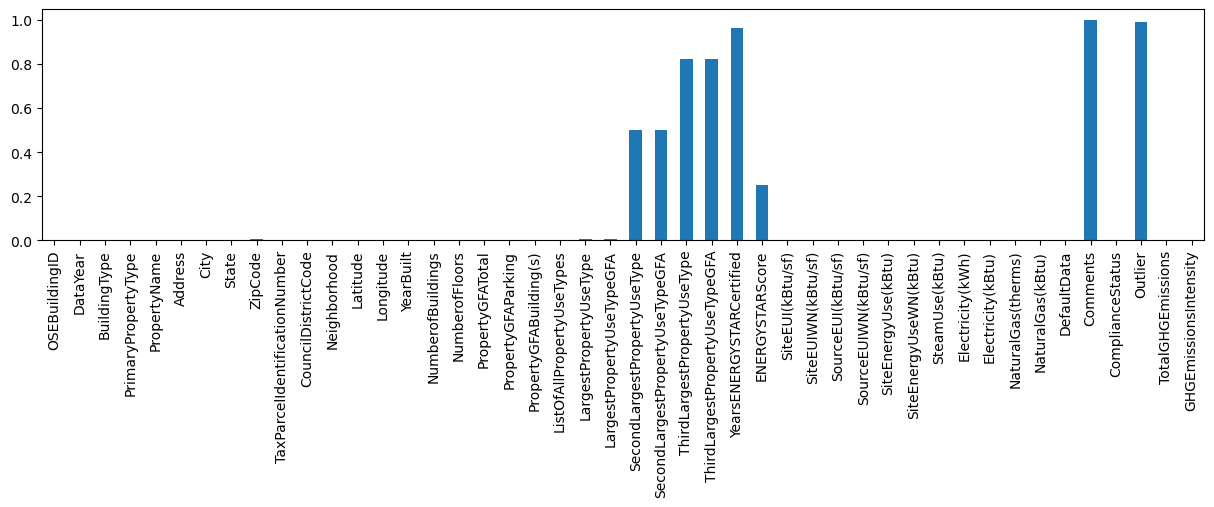

In [5108]:
plt.figure(figsize=[15, 3])
raw_data.isna().mean().plot(kind="bar")

The first look at the data set shows that it's quite small and contains good quality data. The types are coherent and the 12% of missing data seems to be justified since they only concern features where the value can be null.

The data description does however seem to highlight a few outliers in some columns. 

---

## Cleaning

We will start by removing the features that will not be usefull for the later analyses

In [5109]:
raw_data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [5110]:
data = raw_data.drop(
    columns=[
        "DataYear",
        "CouncilDistrictCode",
        "ZipCode",
        "Address",
        "City",
        "State",
        "TaxParcelIdentificationNumber",
        "Comments",
        "DefaultData",
    ]
)

data

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,NaN,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,NaN,295.86,2.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,NaN,2089.28,2.19
3,5,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,NaN,286.43,4.67
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,47.61375,-122.34047,1980,1.0,18,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,Horticulture building,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,...,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,NaN,32.17,2.01
3373,50224,Nonresidential COS,Other,Queen Anne Pool,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,NaN,223.54,16.99
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,...,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,NaN,22.11,1.57


Check whether we have duplicated buildings:

In [5111]:
data.loc[data["OSEBuildingID"].duplicated()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


In [5112]:
data = data.drop(columns=["OSEBuildingID"])

In [5113]:
data["ComplianceStatus"].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

We can remove buildings that have not met energy benchmarking requirements for the current reporting year:

In [5114]:
non_compliant_buildings = data.loc[~data["ComplianceStatus"].isin(["Compliant"])]
non_compliant_buildings

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
22,SPS-District K-12,K-12 School,Graham Hill Elementary,SOUTHEAST,47.54576,-122.26853,1961,1.0,2,56228,...,1.713624e+06,0.0,2.746059e+05,9.369550e+05,6025.229004,6.025230e+05,Error - Correct Default Data,NaN,38.53,0.69
28,SPS-District K-12,K-12 School,Meany Building,Central,47.62266,-122.30547,1955,1.0,1,126351,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,Missing Data,NaN,0.00,0.00
30,SPS-District K-12,K-12 School,Jane Addams Middle,NORTH,47.70994,-122.29301,1949,1.0,2,160645,...,7.800350e+06,0.0,5.708092e+05,1.947601e+06,48315.718750,4.831572e+06,Error - Correct Default Data,NaN,270.18,1.68
31,SPS-District K-12,K-12 School,John Hay Elementary,MAGNOLIA / QUEEN ANNE,47.63290,-122.35172,1989,1.0,2,51582,...,0.000000e+00,0.0,4.386917e+05,1.496816e+06,0.000000,0.000000e+00,Missing Data,NaN,10.43,0.20
38,SPS-District K-12,K-12 School,Eckstein Middle,NORTHEAST,47.68252,-122.29498,1950,1.0,2,175565,...,7.329818e+06,0.0,4.688405e+05,1.599684e+06,47994.433590,4.799443e+06,Error - Correct Default Data,NaN,266.05,1.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,Multifamily LR (1-4),Low-Rise Multifamily,Stewart House,DOWNTOWN,47.60994,-122.34234,1904,1.0,3,49000,...,4.691944e+06,0.0,1.054889e+06,3.599281e+06,10035.120120,1.003512e+06,Non-Compliant,High outlier,78.39,1.60
3341,Multifamily MR (5-9),Mid-Rise Multifamily,The Westside Off Broadway,EAST,47.62107,-122.32156,2015,1.0,7,41384,...,1.340900e+04,0.0,3.930000e+03,1.340900e+04,0.000000,0.000000e+00,Non-Compliant,Low outlier,0.09,0.00
3366,Nonresidential COS,Office,Central West HQ / Brown Bear,MAGNOLIA / QUEEN ANNE,47.63572,-122.37525,1952,1.0,1,13661,...,5.585251e+05,0.0,1.473235e+05,5.026678e+05,0.000000,0.000000e+00,Error - Correct Default Data,NaN,3.50,0.26
3369,Nonresidential COS,Office,Genesee/SC SE HQ,SOUTHEAST,47.56440,-122.27813,1960,1.0,1,15398,...,4.141724e+05,0.0,8.134140e+04,2.775369e+05,1102.729980,1.102730e+05,Error - Correct Default Data,NaN,7.79,0.51


In [5115]:
data = data.drop(non_compliant_buildings.index)
data.drop(columns=["ComplianceStatus"], inplace=True)

In [5116]:
data["Outlier"].unique()

array([nan], dtype=object)

We can drop the "Outlier" column since all outliers have been removed by the the compliance status

In [5117]:
data.drop(columns=["Outlier"], inplace=True)

In [5118]:
data.select_dtypes(exclude=["object", "bool"]).describe()

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3211.000000,3211.000000,3211.000000,3208.000000,3211.000000,3.211000e+03,3211.000000,3.211000e+03,3.196000e+03,1647.000000,...,3207.000000,3.211000e+03,3.210000e+03,3.207000e+03,3.207000e+03,3.207000e+03,3.207000e+03,3.207000e+03,3207.000000,3207.000000
mean,47.624544,-122.335136,1968.739645,1.110973,4.804734,9.579423e+04,8363.015883,8.743122e+04,7.945189e+04,28235.887248,...,140.104615,5.533766e+06,5.390987e+06,2.853587e+05,1.113869e+06,3.800520e+06,1.387511e+04,1.387511e+06,122.211886,1.189146
std,0.047004,0.026574,33.163544,2.158983,5.591453,2.227902e+05,33090.184050,2.115593e+05,2.055745e+05,52296.359208,...,139.521632,2.211048e+07,1.628833e+07,4.005355e+06,4.450274e+06,1.518433e+07,6.866490e+04,6.866490e+06,551.534876,1.843667
min,47.502240,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,...,-2.100000,5.713320e+04,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000
25%,47.601050,-122.350425,1948.000000,1.000000,2.000000,2.830000e+04,0.000000,2.756350e+04,2.498950e+04,5000.000000,...,79.199997,9.368353e+05,9.869139e+05,0.000000e+00,1.884397e+05,6.429560e+05,0.000000e+00,0.000000e+00,9.640000,0.210000
50%,47.618910,-122.332630,1975.000000,1.000000,4.000000,4.379400e+04,0.000000,4.281600e+04,3.900000e+04,10800.000000,...,102.900002,1.808401e+06,1.904452e+06,0.000000e+00,3.479411e+05,1.187175e+06,3.194000e+03,3.194000e+05,33.920000,0.610000
75%,47.656745,-122.320200,1997.000000,1.000000,5.000000,9.154000e+04,0.000000,8.449850e+04,7.676675e+04,26770.000000,...,151.100006,4.266934e+06,4.426424e+06,0.000000e+00,8.466251e+05,2.888685e+06,1.183018e+04,1.183018e+06,94.385000,1.380000
max,47.733870,-122.260280,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,639931.000000,...,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


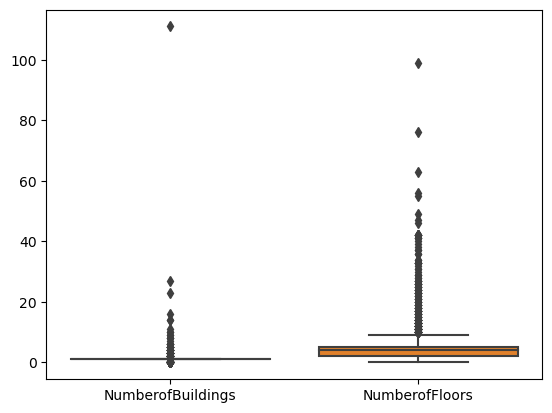

In [5119]:
sns.boxplot(data=data[["NumberofBuildings", "NumberofFloors"]])
plt.show()

NumberofBuildings should not contain any 0, we will therefore replace them with 1 

In [5120]:
data.loc[data["NumberofBuildings"] == 0, "NumberofBuildings"] = 1

In [5121]:
data.loc[data["NumberofBuildings"].isna()]

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
1768,Multifamily LR (1-4),Low-Rise Multifamily,GRAHAM VIEW,SOUTHWEST,47.54731,-122.38656,1992,NaN,4,29357,...,NaN,5.636832e+05,593798.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2321,Multifamily LR (1-4),Low-Rise Multifamily,PONDERAY APTS,NORTHEAST,47.67025,-122.31232,1963,NaN,4,28472,...,NaN,7.702755e+05,797507.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2480,Multifamily LR (1-4),Low-Rise Multifamily,Villa Andora,SOUTHWEST,47.58968,-122.38587,1969,NaN,3,30420,...,NaN,1.049639e+06,1126781.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will do the same for these Residential Buildings

In [5122]:
data.loc[data["NumberofBuildings"].isna(), "NumberofBuildings"] = 1

In [5123]:
data.loc[(data["NumberofFloors"] == 0)]

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
166,NonResidential,Hotel,Grand Hyatt Seattle,DOWNTOWN,47.61275,-122.33330,1999,1.0,0,934292,...,278.200012,6.504728e+07,66502836.0,0.0,1.153696e+07,39364114.0,256831.625000,25683162.0,1638.46,1.75
487,NonResidential,Medical Office,Arnold Pavilion,EAST,47.60979,-122.32298,2004,1.0,0,225982,...,245.300003,2.056062e+07,20764814.0,7815663.0,3.735333e+06,12744957.0,0.000000,0.0,692.12,3.06
488,NonResidential,Mixed Use Property,2200 Westlake - SEDO,DOWNTOWN,47.61783,-122.33729,2006,1.0,0,516407,...,202.000000,3.940332e+07,40754364.0,0.0,8.626261e+06,29432803.0,99705.117190,9970512.0,734.72,1.42
564,NonResidential,Other,Pacific Place,DOWNTOWN,47.61289,-122.33531,1999,1.0,0,947987,...,194.899994,4.651096e+07,46343304.0,0.0,1.363158e+07,46510954.0,0.000000,0.0,324.25,0.34
1754,NonResidential,Medical Office,HART First Hill LLC,EAST,47.60862,-122.32372,1945,1.0,0,274568,...,233.100006,2.531153e+07,25358122.0,13296249.0,3.521476e+06,12015275.0,0.000000,0.0,1110.07,4.04
1993,Campus,Other,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...,GREATER DUWAMISH,47.59042,-122.32498,1991,10.0,0,230971,...,242.199997,2.102229e+07,22230844.0,0.0,4.519276e+06,15419770.0,56025.152340,5602515.0,405.05,1.75
3130,NonResidential,Warehouse,Sandpoint #5,NORTHEAST,47.68454,-122.26235,1940,1.0,0,384772,...,86.500000,1.520676e+07,16139557.0,0.0,2.642108e+06,9014872.0,61918.878910,6191888.0,391.70,1.02
3131,NonResidential,Medical Office,Sandpoint #25,NORTHEAST,47.68240,-122.26223,1960,1.0,0,30287,...,220.600006,2.193115e+06,2279632.5,0.0,5.320647e+05,1815405.0,3777.100342,377710.0,32.72,1.08
3132,NonResidential,Small- and Mid-Sized Office,Sandpoint #29,NORTHEAST,47.68254,-122.26299,1960,1.0,0,21931,...,233.300003,3.947209e+06,4292216.0,0.0,4.099035e+05,1398591.0,25486.185550,2548619.0,145.11,6.62
3168,Nonresidential COS,Other,Magnuson,NORTHEAST,47.68212,-122.26330,1929,8.0,0,502030,...,74.300003,1.847034e+07,20672948.0,0.0,2.743225e+06,9359884.0,91104.546880,9110455.0,549.11,1.09


It is unlikely that these buildings have 1 floor, we will therefore replace with the median:

In [5124]:
data.loc[data["NumberofFloors"] == 0, "NumberofFloors"] = data[
    "NumberofFloors"
].median()

In [5125]:
data.loc[data["NumberofFloors"] > 60]

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
233,Nonresidential COS,Large Office,Seattle Municipal Tower (2030),DOWNTOWN,47.60501,-122.32988,1990,1.0,63,1354987,...,158.100006,6.157618e+07,6.157618e+07,0.0,18046946.0,61576180.0,0.00000,0.0,429.27,0.32
559,NonResidential,Large Office,Columbia Center - 2015,DOWNTOWN,47.60454,-122.33072,1985,1.0,76,1952220,...,166.500000,9.293764e+07,9.253726e+07,0.0,25747908.0,87851862.0,50857.63281,5085763.0,882.56,0.45
1359,NonResidential,Worship Facility,Seattle Chinese Baptist Church,GREATER DUWAMISH,47.55072,-122.30265,1977,1.0,99,21948,...,46.599998,3.260012e+05,3.260012e+05,0.0,95545.5,326001.0,0.00000,0.0,2.27,0.10


Seattle Municipal Tower (2030) is actually still at concept level, the values are therefore predictions, we will therefore drop this building. 

The Baptist Church only contains 2 floors, we will therefore correct the value

In [5126]:
data = data.drop(index=233)

data.loc[1359, "NumberofFloors"] = 2

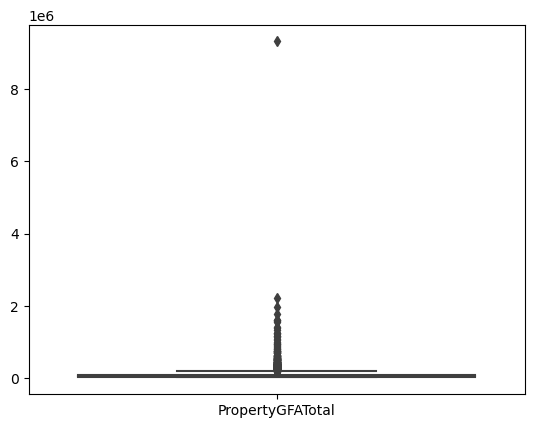

In [5127]:
sns.boxplot(data=data[["PropertyGFATotal"]])
plt.show()

In [5128]:
(
    data.loc[data["PropertyGFATotal"] > 2e6].sort_values(
        by="PropertyGFATotal", ascending=False
    )
).head(10)

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
3274,Campus,University,University of Washington - Seattle Campus,NORTHEAST,47.65644,-122.31041,1900,111.0,4,9320156,...,0.000000,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0000,0.0,11140.56,1.20
1494,Campus,University,Entire Campus,EAST,47.61065,-122.31711,1939,1.0,2,2200000,...,151.300003,114648520.0,123205560.0,0.0,18075270.0,61672821.0,529756.9375,52975694.0,3243.48,1.47


We can remove the University of Washington - Seattle Campus as is it a very big outlier

In [5129]:
data = data.drop(index=3274)

data

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,...,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83
1,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,...,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86
2,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,...,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19
3,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,...,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,...,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,Nonresidential COS,Other,High Point Community Center,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,1982,1.0,1,18261,...,136.600006,9.320821e+05,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,20.33,1.11
3372,Nonresidential COS,Other,International district/Chinatown CC,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,...,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01
3373,Nonresidential COS,Other,Queen Anne Pool,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,...,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99
3374,Nonresidential COS,Mixed Use Property,South Park Community Center,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,...,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57


In [5130]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

All buildings have at least one type of use, we will try to fill in the missing values for these features

In [5131]:
data.loc[data["ListOfAllPropertyUseTypes"].isna()]

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
1768,Multifamily LR (1-4),Low-Rise Multifamily,GRAHAM VIEW,SOUTHWEST,47.54731,-122.38656,1992,1.0,4,29357,...,NaN,5.636832e+05,5.937986e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2321,Multifamily LR (1-4),Low-Rise Multifamily,PONDERAY APTS,NORTHEAST,47.67025,-122.31232,1963,1.0,4,28472,...,NaN,7.702755e+05,7.975070e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2480,Multifamily LR (1-4),Low-Rise Multifamily,Villa Andora,SOUTHWEST,47.58968,-122.38587,1969,1.0,3,30420,...,NaN,1.049639e+06,1.126782e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3348,Multifamily LR (1-4),Low-Rise Multifamily,STREAM FIFTEEN,EAST,47.62441,-122.31300,2015,1.0,4,36685,...,NaN,8.202201e+05,8.576127e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These 4 residential buildings have a lot of missing values and won't be useful later on, we can drop them:

In [5132]:
data = data.drop(data.loc[data["ListOfAllPropertyUseTypes"].isna()].index)

In [5133]:
missing_property_use_type = data.loc[
    data["LargestPropertyUseType"].isna(),
    "NumberofBuildings":"ThirdLargestPropertyUseTypeGFA",
]
missing_property_use_type

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
353,2.0,2,111445,0,111445,"Fitness Center/Health Club/Gym, Office, Other ...",NaN,NaN,NaN,NaN,NaN,NaN
1077,1.0,13,219874,0,219874,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN
1147,1.0,8,61721,0,61721,Hotel,NaN,NaN,NaN,NaN,NaN,NaN
1483,1.0,5,45715,0,45715,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN
1756,1.0,17,76855,0,76855,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN
2336,1.0,4,20844,0,20844,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN
2414,1.0,4,48350,0,48350,Office,NaN,NaN,NaN,NaN,NaN,NaN
2459,1.0,3,28800,0,28800,Restaurant,NaN,NaN,NaN,NaN,NaN,NaN
2545,1.0,3,35122,0,35122,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN
2886,1.0,3,42448,0,42448,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN


In [5134]:
data.loc[missing_property_use_type.index, "LargestPropertyUseType"] = data[
    "ListOfAllPropertyUseTypes"
]
data.loc[missing_property_use_type.index, "LargestPropertyUseTypeGFA"] = data[
    "PropertyGFATotal"
]

We can drop the two buildings with multiple property uses since we won't be able to properly fill in missing values

In [5135]:
data = data.drop(index=[353, 3040])

We can replace null values for buildings that have only one type of use:

In [5136]:
data["SecondLargestPropertyUseType"].isna().mean()

0.4861067748985326

In [5137]:
data.loc[
    data["SecondLargestPropertyUseType"].isna(), "SecondLargestPropertyUseType"
] = "None"
data.loc[
    data["ThirdLargestPropertyUseType"].isna(), "ThirdLargestPropertyUseType"
] = "None"
data.loc[
    data["SecondLargestPropertyUseTypeGFA"].isna(), "SecondLargestPropertyUseTypeGFA"
] = 0
data.loc[
    data["ThirdLargestPropertyUseTypeGFA"].isna(), "ThirdLargestPropertyUseTypeGFA"
] = 0

We can now check whether some totals are incoherent 

In [5138]:
data.loc[
    data["PropertyGFATotal"]
    != (data["PropertyGFAParking"] + data["PropertyGFABuilding(s)"])
]

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity


In [5139]:
erroneous_energy_total = data.loc[
    abs(
        round(data["SiteEnergyUse(kBtu)"])
        - round(
            data["Electricity(kBtu)"]
            + data["NaturalGas(kBtu)"]
            + data["SteamUse(kBtu)"]
        )
    )
    > 100,
    "SiteEUI(kBtu/sf)":,
]
erroneous_energy_total

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
69,64.300003,64.500000,151.600006,152.100006,2.365898e+07,2.373692e+07,6093150.0,4.226010e+06,14419146.0,6886.799805,688680.0,607.41,1.56
70,125.199997,125.900002,261.700012,265.399994,8.141156e+06,8.181881e+06,4120130.0,1.100268e+06,3754115.0,0.000000,0.0,344.20,3.77
71,75.199997,76.300003,138.100006,140.000000,2.095503e+07,2.125784e+07,9763690.0,2.125535e+06,7252325.0,0.000000,0.0,804.20,2.03
73,52.400002,51.599998,110.400002,109.500000,2.726369e+06,2.682243e+06,1202380.0,3.790589e+05,1293349.0,0.000000,0.0,101.83,1.96
75,70.000000,70.300003,171.199997,175.199997,2.072325e+07,2.082352e+07,5137220.0,3.960342e+06,13512686.0,0.000000,0.0,490.73,1.87
206,60.299999,62.400002,189.500000,195.899994,4.084775e+07,4.222740e+07,0.0,1.196941e+07,40839637.0,5382.505371,538251.0,313.30,0.40
329,389.100006,385.600006,1026.599976,1001.000000,6.176238e+07,6.121474e+07,5650343.5,1.363676e+07,46528618.0,95718.156250,9571816.0,1268.87,7.99
371,68.699997,68.699997,211.300003,211.300003,1.132551e+07,1.132551e+07,0.0,3.219974e+06,10986553.0,3366.104004,336610.0,94.47,0.34
403,41.599998,42.200001,113.500000,113.500000,9.058916e+06,9.200102e+06,0.0,2.308732e+06,7877393.0,0.000000,0.0,54.92,0.16
505,55.599998,58.500000,0.000000,0.000000,5.974994e+06,6.284896e+06,0.0,5.764793e+05,1966947.0,0.000000,0.0,13.71,0.06


In [5140]:
len(erroneous_energy_total)

42

We will remove the buildings with erroneous energy values

In [5141]:
data = data.drop(erroneous_energy_total.index)

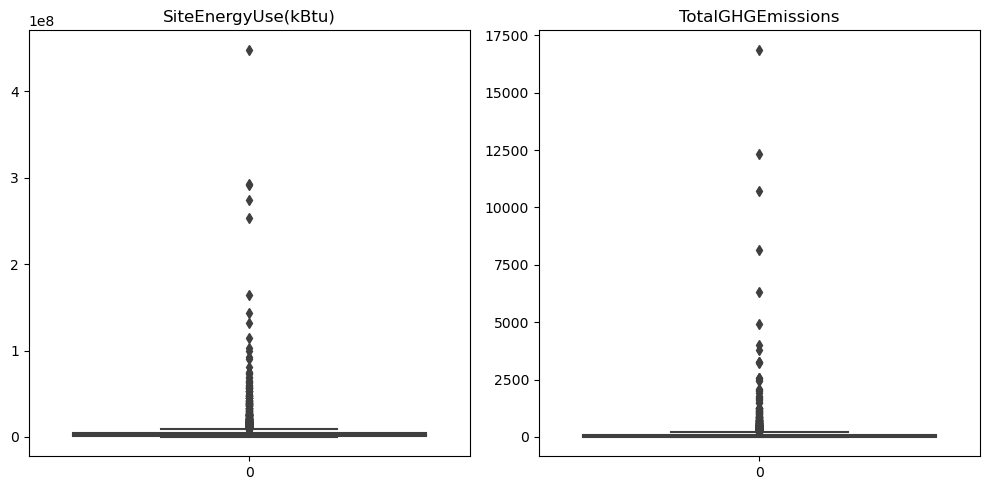

In [5142]:
fig, ax = plt.subplots(1, 2, figsize=[10, 5])
sns.boxplot(data=data["SiteEnergyUse(kBtu)"], ax=ax[0])
ax[0].set_title("SiteEnergyUse(kBtu)")
sns.boxplot(data=data["TotalGHGEmissions"], ax=ax[1])
ax[1].set_title("TotalGHGEmissions")
plt.tight_layout()
plt.show()

In [5143]:
energy_use_outliers = data.loc[
    data["SiteEnergyUse(kBtu)"] > 2e8,
    ["PropertyGFATotal", "BuildingType", "PrimaryPropertyType", "SiteEnergyUse(kBtu)"],
].sort_values(by="PropertyGFATotal", ascending=False)

energy_use_outliers

,PropertyGFATotal,BuildingType,PrimaryPropertyType,SiteEnergyUse(kBtu)
618,1765970,NonResidential,Hospital,291614432.0
170,1158691,NonResidential,Hospital,293090784.0
124,879000,NonResidential,Hospital,253832464.0
35,494835,Campus,Mixed Use Property,448385312.0
558,429405,NonResidential,Other,274682208.0


These outliers, mostly hospitals, will be removed from the data set used for further analysis

In [5144]:
data.drop(energy_use_outliers.index, inplace=True)

In [5145]:
data.columns[data.isna().any()]

Index(['YearsENERGYSTARCertified', 'ENERGYSTARScore'], dtype='object')

## Feature Engineering

We will exploit some of the features to create new ones that can be exploited for further analyses.

We can start by calculating the percentage of usage of each energy source:

In [5146]:
data["ElectricityUse(Percentage)"] = (
    data["Electricity(kBtu)"] / data["SiteEnergyUse(kBtu)"] * 100
)

data["SteamUse(Percentage)"] = (
    data["SteamUse(kBtu)"] / data["SiteEnergyUse(kBtu)"] * 100
)

data["NaturalGasUse(Percentage)"] = (
    data["NaturalGas(kBtu)"] / data["SiteEnergyUse(kBtu)"] * 100
)

In [5147]:
buildings_wo_energy_use = data.loc[
    data["SteamUse(Percentage)"].isna()
    | data["ElectricityUse(Percentage)"].isna()
    | data["NaturalGasUse(Percentage)"].isna()
]

buildings_wo_energy_use

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ElectricityUse(Percentage),SteamUse(Percentage),NaturalGasUse(Percentage)


We can add a feature to count the number of years a building has obtained the EnergyStar Certification

In [5148]:
data["NumberOfYearsENERGYSTARCertified"] = len(data["YearsENERGYSTARCertified"]) / 4

data.loc[
    data["YearsENERGYSTARCertified"].isnull(), "NumberOfYearsENERGYSTARCertified"
] = 0

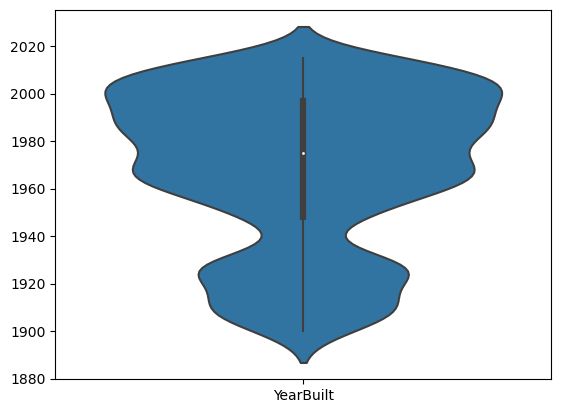

In [5149]:
sns.violinplot(data[["YearBuilt"]])
plt.show()

We can calculate the age of a building from its construction year:

In [5150]:
data["BuildingAge"] = 2016 - data["YearBuilt"]

data.describe()

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ElectricityUse(Percentage),SteamUse(Percentage),NaturalGasUse(Percentage),NumberOfYearsENERGYSTARCertified,BuildingAge
count,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3.156000e+03,3156.000000,3.156000e+03,3.156000e+03,3156.000000,...,3.156000e+03,3156.000000,3.156000e+03,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.00000,3156.000000
mean,47.624663,-122.335110,1968.540558,1.098859,4.754119,9.018967e+04,8219.090938,8.197058e+04,7.410996e+04,13835.823288,...,3.273630e+06,12503.340815,1.250334e+06,101.953634,1.171483,73.481007,1.175387,25.343598,28.25000,47.459442
std,0.047157,0.026582,33.150676,0.913563,5.174704,1.449293e+05,32946.345030,1.270302e+05,1.160307e+05,36942.042778,...,6.904010e+06,37338.308161,3.733831e+06,274.823475,1.738506,27.171268,7.024633,27.046695,146.62196,33.150676
min,47.502240,-122.414250,1900.000000,1.000000,1.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.400000,0.010000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,47.601050,-122.350320,1948.000000,1.000000,2.000000,2.816800e+04,0.000000,2.748525e+04,2.493425e+04,0.000000,...,6.409742e+05,0.000000,0.000000e+00,9.507500,0.210000,53.502666,0.000000,0.000000,0.00000,19.000000
50%,47.618935,-122.332655,1975.000000,1.000000,4.000000,4.349200e+04,0.000000,4.234300e+04,3.879350e+04,0.000000,...,1.175894e+06,3226.268799,3.226270e+05,33.390000,0.610000,78.112641,0.000000,18.448354,0.00000,41.000000
75%,47.657157,-122.320198,1997.000000,1.000000,5.000000,8.954925e+04,0.000000,8.289100e+04,7.421525e+04,11066.750000,...,2.843269e+06,11815.762450,1.181576e+06,92.752500,1.370000,99.999975,0.000000,45.176094,0.00000,68.000000
max,47.733870,-122.260280,2015.000000,27.000000,76.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,438756.000000,...,9.006050e+07,846680.937500,8.466809e+07,6330.910000,25.710000,100.000342,76.698738,100.000000,789.00000,116.000000


In [5151]:
data.select_dtypes(include=["object", "bool"])

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified
0,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,Hotel,Hotel,None,None,NaN
1,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN
2,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,Hotel,Hotel,None,None,NaN
3,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,Hotel,Hotel,None,None,NaN
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN
...,...,...,...,...,...,...,...,...,...
3370,Nonresidential COS,Other,High Point Community Center,DELRIDGE NEIGHBORHOODS,Other - Recreation,Other - Recreation,None,None,NaN
3372,Nonresidential COS,Other,International district/Chinatown CC,DOWNTOWN,Other - Recreation,Other - Recreation,None,None,NaN
3373,Nonresidential COS,Other,Queen Anne Pool,MAGNOLIA / QUEEN ANNE,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,NaN
3374,Nonresidential COS,Mixed Use Property,South Park Community Center,GREATER DUWAMISH,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,NaN


In [5152]:
data["PrimaryPropertyType"].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'K-12 School',
       'Large Office', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital', 'Residence Hall',
       'Distribution Center', 'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily'],
      dtype=object)

In [5153]:
def get_unique_property_uses():
    all_building_uses = set()

    for use_string in data["ListOfAllPropertyUseTypes"]:
        uses = re.split(r",\s*(?![^()]*\))", use_string)
        all_building_uses.update(uses)
    return all_building_uses


def count_property_uses(data):
    data["NumberOfPropertyUses"] = data["ListOfAllPropertyUseTypes"].apply(
        lambda use_string: sum(
            1
            for use in re.split(r",\s*(?![^()]*\))", use_string)
            if use in get_unique_property_uses()
        )
    )

    return data


data = count_property_uses(data)

data[["ListOfAllPropertyUseTypes", "NumberOfPropertyUses"]]

,ListOfAllPropertyUseTypes,NumberOfPropertyUses
0,Hotel,1
1,"Hotel, Parking, Restaurant",3
2,Hotel,1
3,Hotel,1
4,"Hotel, Parking, Swimming Pool",3
...,...,...
3370,Other - Recreation,1
3372,Other - Recreation,1
3373,"Fitness Center/Health Club/Gym, Other - Recrea...",3
3374,"Fitness Center/Health Club/Gym, Food Service, ...",5


In [5154]:
general_uses = {
    "Enclosed Mall": " Commercial",
    "Automobile Dealership": "Commercial",
    "Other - Mall": "Commercial",
    "Retail Store": "Commercial",
    "Strip Mall": "Commercial",
    "Supermarket/Grocery Store": "Commercial",
    "Wholesale Club/Supercenter": "Commercial",
    "Supermarket / Grocery Store": "Commercial",
    "Adult Education": "Education",
    "College/University": "Education",
    "K-12 School": "Education",
    "Other - Education": "Education",
    "Other - Technology/Science": "Education",
    "Performing Arts": "Education",
    "Pre-school/Daycare": "Education",
    "Vocational School": "Education",
    "University": "Education",
    "Hospital (General Medical & Surgical)": "Health",
    "Medical Office": "Health",
    "Other/Specialty Hospital": "Health",
    "Outpatient Rehabilitation/Physical Therapy": "Health",
    "Urgent Care/Clinic/Other Outpatient": "Health",
    "Hospital": "Health",
    "Fast Food Restaurant": "Hospitality",
    "Food Sales": "Hospitality",
    "Food Service": "Hospitality",
    "Hotel": "Hospitality",
    "Other - Restaurant/Bar": "Hospitality",
    "Restaurant": "Hospitality",
    "Bar/Nightclub": "Leisure",
    "Movie Theater": "Leisure",
    "Museum": "Leisure",
    "Other - Entertainment/Public Assembly": "Leisure",
    "Other - Recreation": "Leisure",
    "Social/Meeting Hall": "Leisure",
    "Low-Rise Multifamily": "Residential",
    "Multifamily Housing": "Residential",
    "Other - Lodging/Residential": "Residential",
    "Residence Hall/Dormitory": "Residential",
    "Residential Care Facility": "Residential",
    "Senior Care Community": "Residential",
    "Single Family Home": "Residential",
    "Mid-Rise Multifamily": "Residential",
    "Residence Hall": "Residential",
    "High-Rise Multifamily": "Residential",
    "Bank Branch": "ServiceFacility",
    "Convenience Store without Gas Station": "ServiceFacility",
    "Courthouse": "ServiceFacility",
    "Data Center": "ServiceFacility",
    "Distribution Center": "ServiceFacility",
    "Financial Office": "ServiceFacility",
    "Fire Station": "ServiceFacility",
    "Fitness Center/Health Club/Gym": "ServiceFacility",
    "Library": "ServiceFacility",
    "Lifestyle Center": "ServiceFacility",
    "Manufacturing/Industrial Plant": "ServiceFacility",
    "Non-Refrigerated Warehouse": "ServiceFacility",
    "Office": "ServiceFacility",
    "Other - Public Services": "ServiceFacility",
    "Other - Services": "ServiceFacility",
    "Other - Utility": "ServiceFacility",
    "Parking": "ServiceFacility",
    "Personal Services (Health/Beauty, Dry Cleaning, etc)": "ServiceFacility",
    "Police Station": "ServiceFacility",
    "Prison/Incarceration": "ServiceFacility",
    "Refrigerated Warehouse": "ServiceFacility",
    "Repair Services (Vehicle, Shoe, Locksmith, etc)": "ServiceFacility",
    "Self-Storage Facility": "ServiceFacility",
    "Swimming Pool": "ServiceFacility",
    "Worship Facility": "ServiceFacility",
    "Mixed Use Property": "ServiceFacility",
    "Small- and Mid-Sized Office": "ServiceFacility",
    "Warehouse": "ServiceFacility",
    "Large Office": "ServiceFacility",
    "Laboratory": "ServiceFacility",
}

features_to_replace = [
    "PrimaryPropertyType",
    "LargestPropertyUseType",
    "SecondLargestPropertyUseType",
    "ThirdLargestPropertyUseType",
]

for feature in features_to_replace:
    data[feature] = data[feature].replace(general_uses)

data[
    [
        "PrimaryPropertyType",
        "LargestPropertyUseType",
        "ListOfAllPropertyUseTypes",
        "SecondLargestPropertyUseType",
        "ThirdLargestPropertyUseType",
    ]
]

,PrimaryPropertyType,LargestPropertyUseType,ListOfAllPropertyUseTypes,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
0,Hospitality,Hospitality,Hotel,None,None
1,Hospitality,Hospitality,"Hotel, Parking, Restaurant",ServiceFacility,Hospitality
2,Hospitality,Hospitality,Hotel,None,None
3,Hospitality,Hospitality,Hotel,None,None
4,Hospitality,Hospitality,"Hotel, Parking, Swimming Pool",ServiceFacility,ServiceFacility
...,...,...,...,...,...
3370,Other,Leisure,Other - Recreation,None,None
3372,Other,Leisure,Other - Recreation,None,None
3373,Other,Leisure,"Fitness Center/Health Club/Gym, Other - Recrea...",ServiceFacility,ServiceFacility
3374,ServiceFacility,Leisure,"Fitness Center/Health Club/Gym, Food Service, ...",ServiceFacility,Education


In [5155]:
encoder = OneHotEncoder()
encoded_matrix = encoder.fit_transform(
    data[
        [
            "PrimaryPropertyType",
            "LargestPropertyUseType",
            "SecondLargestPropertyUseType",
            "ThirdLargestPropertyUseType",
        ]
    ]
)
encoded_array = encoded_matrix.toarray()
encoded_primary_property = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(
        [
            "PrimaryPropertyType",
            "LargestPropertyUseType",
            "SecondLargestPropertyUseType",
            "ThirdLargestPropertyUseType",
        ]
    ),
)
encoded_primary_property

,PrimaryPropertyType_Commercial,PrimaryPropertyType_Education,PrimaryPropertyType_Health,PrimaryPropertyType_Hospitality,PrimaryPropertyType_Other,PrimaryPropertyType_Residential,PrimaryPropertyType_ServiceFacility,LargestPropertyUseType_Commercial,LargestPropertyUseType_Education,LargestPropertyUseType_Health,...,SecondLargestPropertyUseType_ServiceFacility,ThirdLargestPropertyUseType_Commercial,ThirdLargestPropertyUseType_Education,ThirdLargestPropertyUseType_Health,ThirdLargestPropertyUseType_Hospitality,ThirdLargestPropertyUseType_Leisure,ThirdLargestPropertyUseType_None,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Residential,ThirdLargestPropertyUseType_ServiceFacility
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3152,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3153,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5156]:
data = data.merge(encoded_primary_property, left_index=True, right_index=True)

In [5157]:
data

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SecondLargestPropertyUseType_ServiceFacility,ThirdLargestPropertyUseType_Commercial,ThirdLargestPropertyUseType_Education,ThirdLargestPropertyUseType_Health,ThirdLargestPropertyUseType_Hospitality,ThirdLargestPropertyUseType_Leisure,ThirdLargestPropertyUseType_None,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Residential,ThirdLargestPropertyUseType_ServiceFacility
0,NonResidential,Hospitality,Mayflower park hotel,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,NonResidential,Hospitality,Paramount Hotel,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,NonResidential,Hospitality,5673-The Westin Seattle,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,NonResidential,Hospitality,HOTEL MAX,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,NonResidential,Hospitality,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Multifamily LR (1-4),Residential,Harvard Crest,EAST,47.61970,-122.32253,1927,1.0,3,29656,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3151,Multifamily MR (5-9),Residential,Hong Kong Building,DOWNTOWN,47.59801,-122.32544,1927,1.0,5,39493,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3153,Multifamily MR (5-9),Residential,The Douglas,CENTRAL,47.60786,-122.31586,2011,1.0,5,140254,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3154,Multifamily LR (1-4),Residential,Santos Place Apts,NORTHEAST,47.67928,-122.26177,1947,1.0,3,38264,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since we aim to predict the energy use and GHG emissions of non residential buildings, we can filter out the residential ones:

In [5158]:
data.loc[data["BuildingType"].str.contains("Multifamily")]

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SecondLargestPropertyUseType_ServiceFacility,ThirdLargestPropertyUseType_Commercial,ThirdLargestPropertyUseType_Education,ThirdLargestPropertyUseType_Health,ThirdLargestPropertyUseType_Hospitality,ThirdLargestPropertyUseType_Leisure,ThirdLargestPropertyUseType_None,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Residential,ThirdLargestPropertyUseType_ServiceFacility
9,Multifamily MR (5-9),Residential,Lyon Building,DOWNTOWN,47.60284,-122.33184,1910,1.0,6,63712,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
165,Multifamily MR (5-9),Residential,YWCA Opportunity Place,DOWNTOWN,47.61316,-122.34153,2003,1.0,7,116947,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
173,Multifamily MR (5-9),Residential,Wintonia,EAST,47.61360,-122.32785,1909,1.0,6,51976,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
188,Multifamily LR (1-4),Residential,Cooper School Artist's Lofts,DELRIDGE,47.56379,-122.36301,1917,1.0,4,56617,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
189,Multifamily MR (5-9),Residential,LAKE CITY COURT,NORTH,47.72232,-122.29181,2009,1.0,6,56745,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,Multifamily LR (1-4),Residential,Brettler Family Place Bld 2,NORTHEAST,47.67790,-122.26166,2011,1.0,3,29646,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3150,Multifamily LR (1-4),Residential,Harvard Crest,EAST,47.61970,-122.32253,1927,1.0,3,29656,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3151,Multifamily MR (5-9),Residential,Hong Kong Building,DOWNTOWN,47.59801,-122.32544,1927,1.0,5,39493,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3153,Multifamily MR (5-9),Residential,The Douglas,CENTRAL,47.60786,-122.31586,2011,1.0,5,140254,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5159]:
all_buildings = data.copy()
non_residential_buildings = data[~data["BuildingType"].str.contains("Multifamily")]

In [5160]:
non_residential_buildings.columns

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'ElectricityUse(Percentage)', 'SteamUse(Percentage)',
       'NaturalGasUse(Percentage)', 'NumberOfYearsENERGYSTARCertified',
       'BuildingAge',

We can now remove all features that won't be of any further use

In [5161]:
columns_to_remove = [
    "SteamUse(kBtu)",
    "Electricity(kWh)",
    "Electricity(kBtu)",
    "NaturalGas(therms)",
    "NaturalGas(kBtu)",
    "SiteEUI(kBtu/sf)",
    "SiteEUIWN(kBtu/sf)",
    "SourceEUI(kBtu/sf)",
    "SourceEUIWN(kBtu/sf)",
    "YearsENERGYSTARCertified",
    "SiteEnergyUseWN(kBtu)",
    "YearBuilt",
    "ListOfAllPropertyUseTypes",
    "PropertyName",
    "LargestPropertyUseType",
    "SecondLargestPropertyUseType",
    "ThirdLargestPropertyUseType",
    "PrimaryPropertyType",
    "BuildingType",
    "Neighborhood",
]

non_residential_buildings = non_residential_buildings.drop(columns=columns_to_remove)
data = data.drop(columns=columns_to_remove)

## Analysis

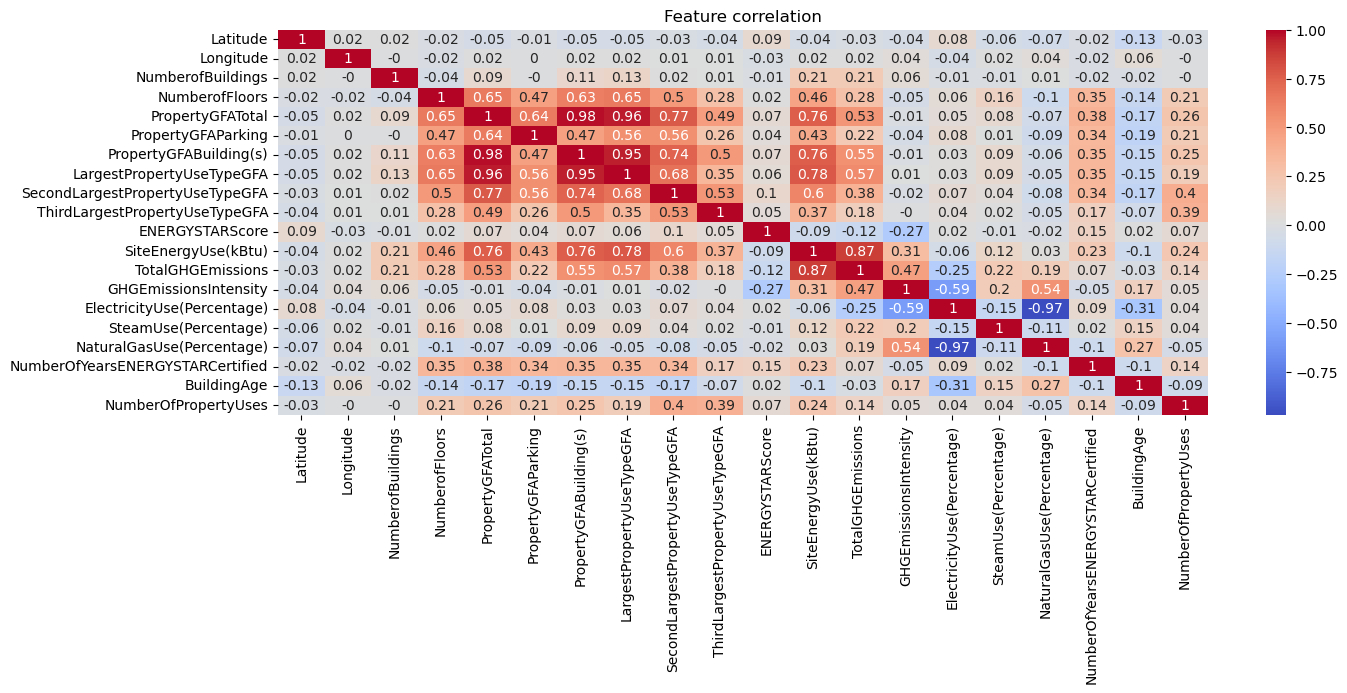

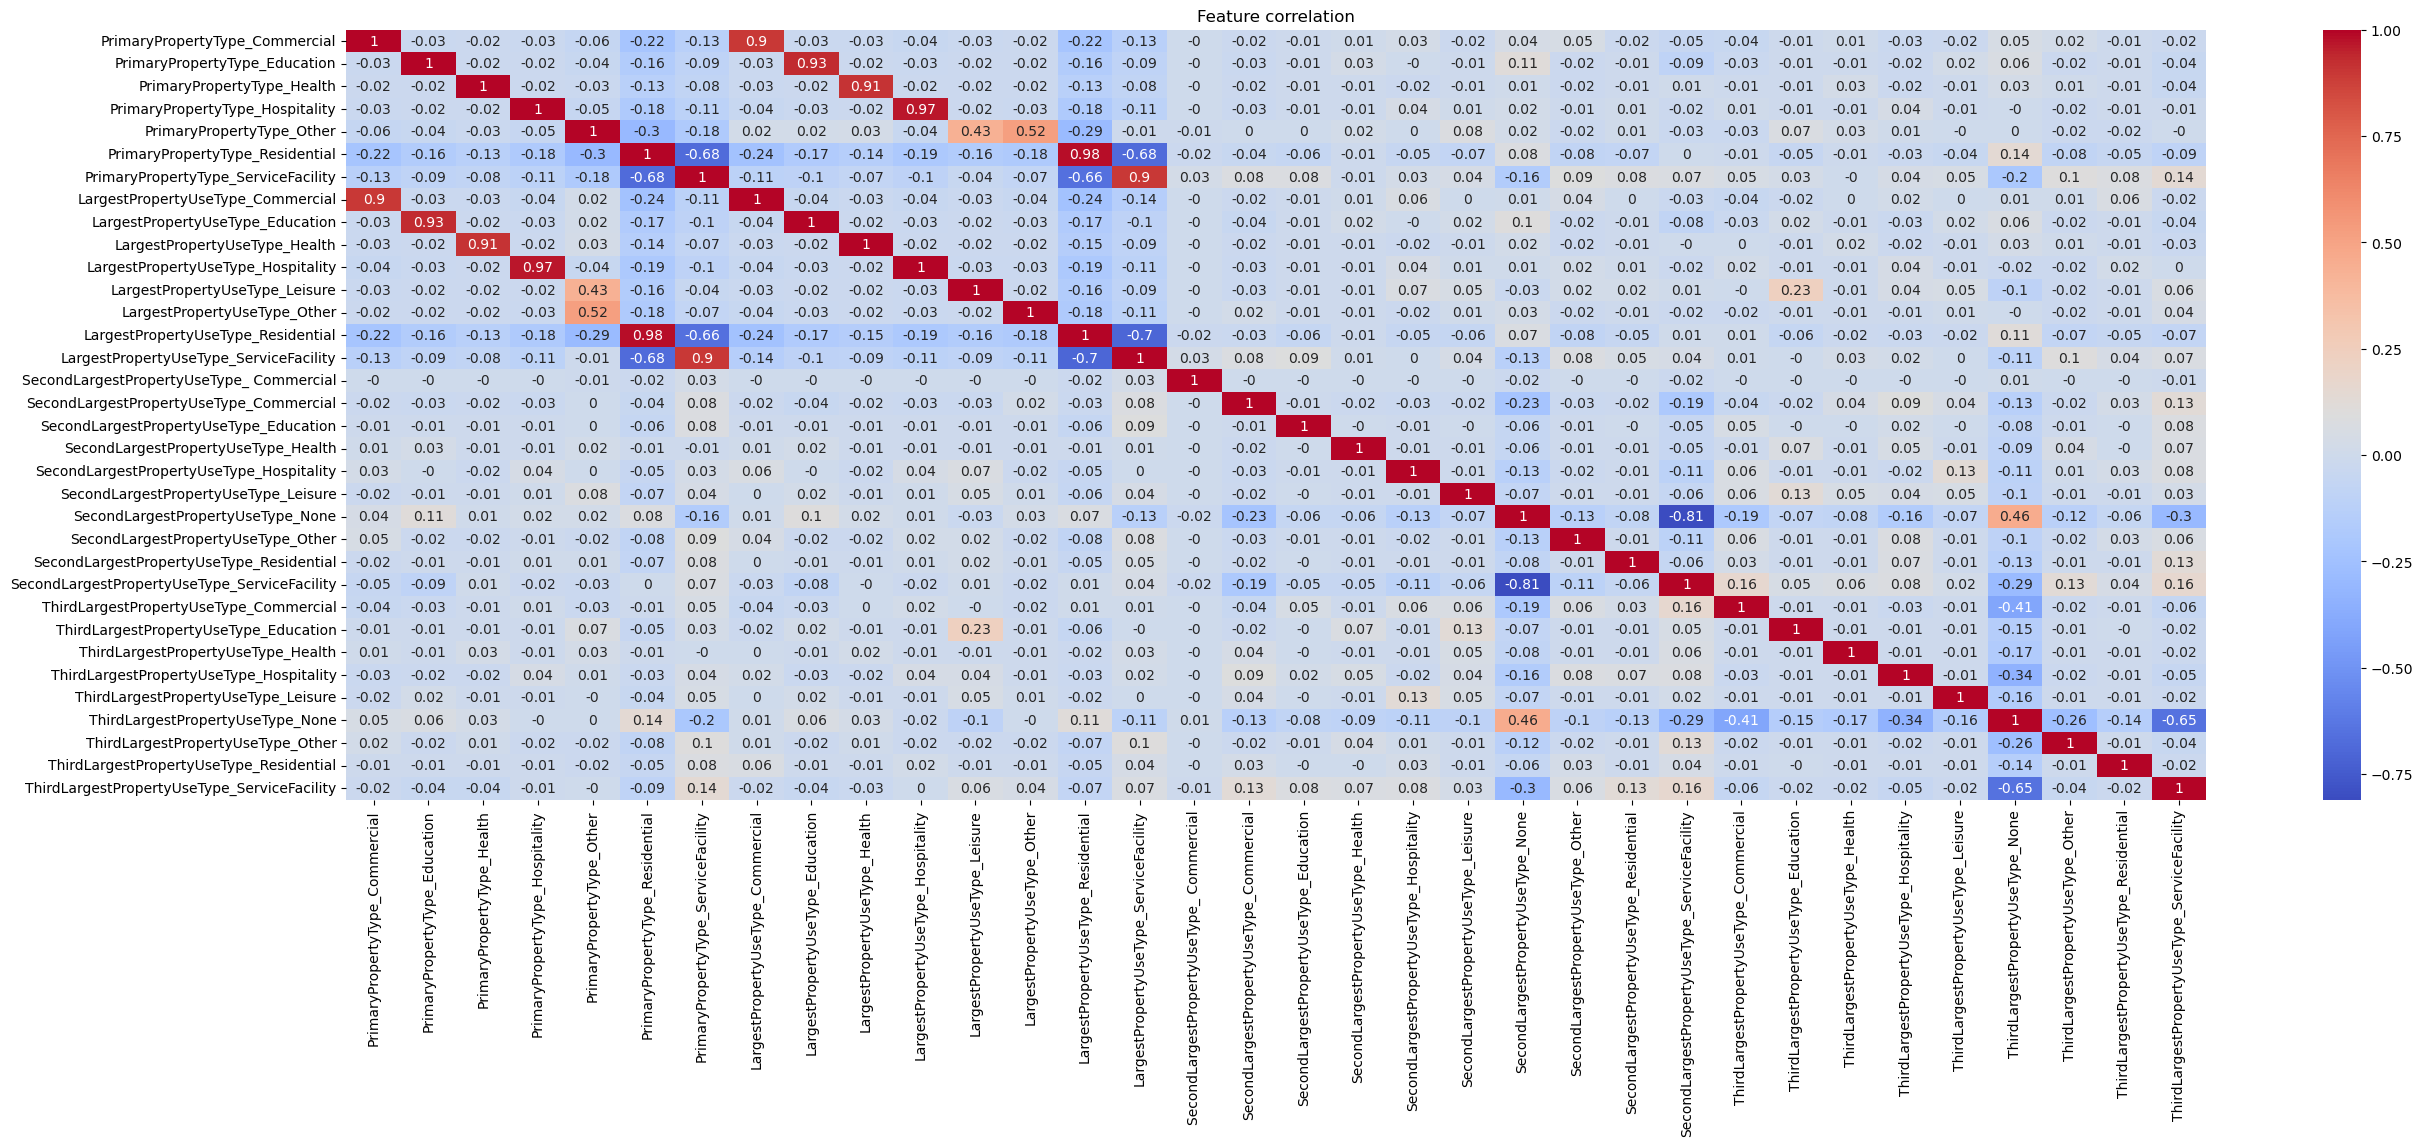

In [5162]:
plt.figure(figsize=[15, 5])
sns.heatmap(
    data.loc[:, :"NumberOfPropertyUses"].corr(numeric_only=True).round(2),
    cmap="coolwarm",
    annot=True,
)
plt.title("Feature correlation")
plt.show()

plt.figure(figsize=[30, 10])
sns.heatmap(
    data.loc[:, "PrimaryPropertyType_Commercial":].corr(numeric_only=True).round(2),
    cmap="coolwarm",
    annot=True,
)
plt.title("Feature correlation")
plt.show()

In [5163]:
data.to_csv("all_buildings.csv")
non_residential_buildings.to_csv("non_residential_buildings.csv")